使用R语言实现MLE和正态性检验。

In [1]:
# 导入数据集
library(haven)
library(tidyverse)
auto <- read_dta("stata_data/auto.dta")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors


In [2]:
auto

# A tibble: 74 × 12
   make        price   mpg rep78 headroom trunk weight length  turn displacement
   <chr>       <dbl> <dbl> <dbl>    <dbl> <dbl>  <dbl>  <dbl> <dbl>        <dbl>
 1 AMC Concord  4099    22     3      2.5    11   2930    186    40          121
 2 AMC Pacer    4749    17     3      3      11   3350    173    40          258
 3 AMC Spirit   3799    22    NA      3      12   2640    168    35          121
 4 Buick Cent…  4816    20     3      4.5    16   3250    196    40          196
 5 Buick Elec…  7827    15     4      4      20   4080    222    43          350
 6 Buick LeSa…  5788    18     3      4      21   3670    218    43          231
 7 Buick Opel   4453    26    NA      3      10   2230    170    34          304
 8 Buick Regal  5189    20     3      2      16   3280    200    42          196
 9 Buick Rivi… 10372    16     3      3.5    17   3880    207    43          231
10 Buick Skyl…  4082    19     3      3.5    13   3400    200    42          231
# ℹ 64 m

# 画图检验正态性

In [3]:
library(ggplot2)

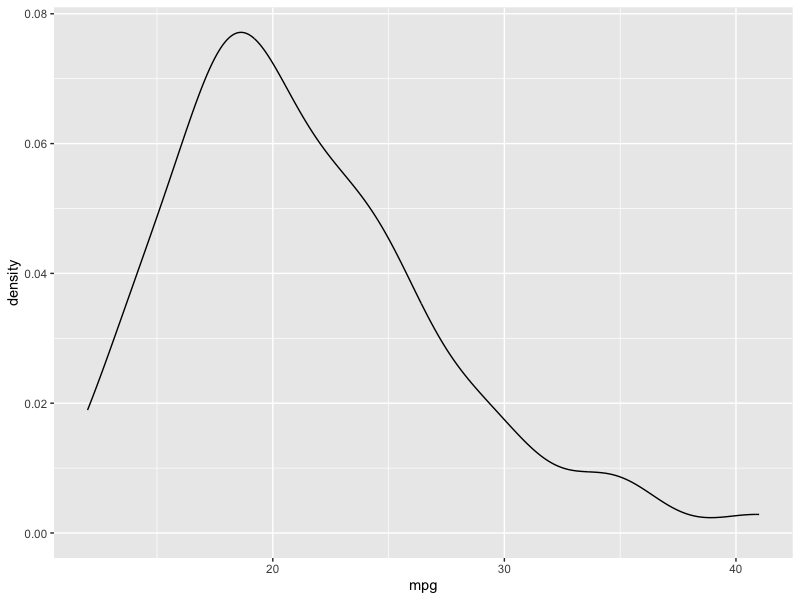

In [4]:
ggplot(data = auto, aes(x = mpg))+ 
  geom_density()

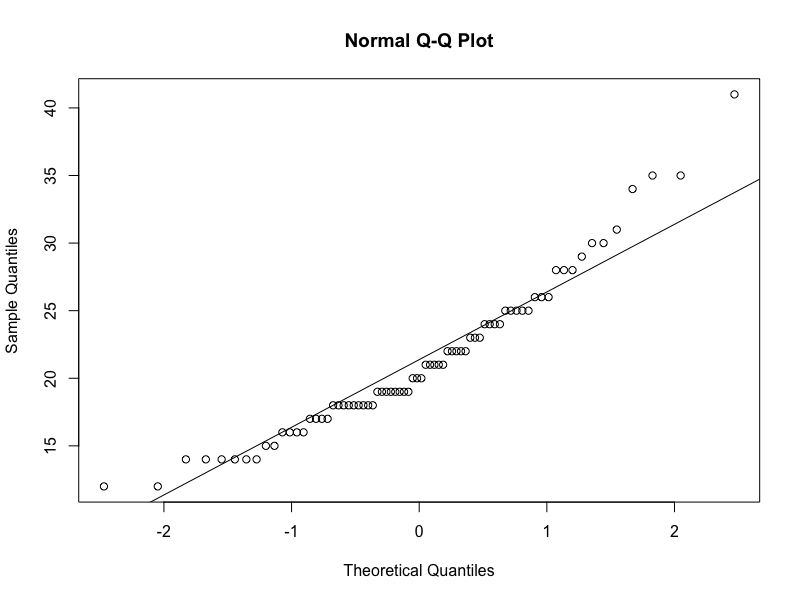

In [5]:
qqnorm(auto$mpg)
qqline(auto$mpg)

# JB 检验

In [6]:
# 执行 Jarque-Bera 检验
library(tseries)
jarque.bera.test(auto$mpg)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

    ‘tseries’ version: 0.10-58

    ‘tseries’ is a package for time series analysis and computational
    finance.

    See ‘library(help="tseries")’ for details.




	Jarque Bera Test

data:  auto$mpg
X-squared = 14.032, df = 2, p-value = 0.0008974


# D'Agostino 检验

In [17]:
install.packages("fBasics")

还安装依赖关系‘timeDate’, ‘timeSeries’, ‘gss’, ‘stabledist’



试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/timeDate_4041.110.tgz'
Content type 'application/x-gzip' length 1429986 bytes (1.4 MB)
downloaded 1.4 MB

试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/timeSeries_4041.111.tgz'
Content type 'application/x-gzip' length 1971351 bytes (1.9 MB)
downloaded 1.9 MB

试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/gss_2.2-8.tgz'
Content type 'application/x-gzip' length 1765769 bytes (1.7 MB)
downloaded 1.7 MB

试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/stabledist_0.7-2.tgz'
Content type 'application/x-gzip' length 76469 bytes (74 KB)
downloaded 74 KB

试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/fBasics_4041.97.tgz'
Content type 'application/x-gzip' length 2679264 bytes (2.6 MB)
downloaded 2.6 MB




下载的二进制程序包在
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//RtmpewP94n/downloaded_packages里


In [7]:
library(fBasics)
dagoTest(auto$mpg)


Title:
 D'Agostino Normality Test

Test Results:
  STATISTIC:
    Chi2 | Omnibus: 13.1325
    Z3  | Skewness: 3.1742
    Z4  | Kurtosis: 1.7485
  P VALUE:
    Omnibus  Test: 0.001407 
    Skewness Test: 0.001503 
    Kurtosis Test: 0.08039 


# 非参数 Shapiro-Wilk 检验

In [8]:
shapiro.test(auto$mpg)


	Shapiro-Wilk normality test

data:  auto$mpg
W = 0.9406, p-value = 0.001713


# 非参数 Shapiro - Francia 检验

In [10]:
library(nortest)
sf.test(auto$mpg)


	Shapiro-Francia normality test

data:  auto$mpg
W = 0.93978, p-value = 0.002393
